In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import dataset

In [2]:
meta_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
meta_data.head(3)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [3]:
di_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
di_data.head(3)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0


In [4]:
image_dir='/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [5]:
di_data['SeriesDescription'].unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
di_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

# Filtering Images

In [7]:
#Filtering dataset based on Series Description to extract specific types of images
cropped_images=di_data[di_data.SeriesDescription=='cropped images'].image_path
full_mammo_images=di_data[di_data.SeriesDescription=='full mammogram images'].image_path
ROI_mask_images=di_data[di_data.SeriesDescription=='ROI mask images'].image_path

# Update Paths

In [8]:
#Updating the paths of the di_data images 
cropped_images=cropped_images.replace('CBIS-DDSM/jpeg',image_dir, regex=True)
full_mammo_images=full_mammo_images.replace('CBIS-DDSM/jpeg',image_dir,regex=True)
ROI_mask_images=ROI_mask_images.replace('CBIS-DDSM/jpeg',image_dir,regex=True)

In [9]:
# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo_images.iloc[0])
print('ROI Mask Images paths:\n')
print(ROI_mask_images.iloc[0])

Cropped Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


# Create dictionaries

In [10]:
#Creating dictionaries where the keys are derived from the paths of the di_data images, where the path is split be /.
full_mammo_images_dict=dict()
cropped_images_dict=dict()
ROI_mask_images_dict=dict()

for data1 in full_mammo_images:
    key=data1.split("/")[5]
    full_mammo_images_dict[key]=data1 
for data1 in cropped_images:
    key=data1.split("/")[5]
    cropped_images_dict[key]=data1   
for data1 in ROI_mask_images:
    key=data1.split("/")[5]
    ROI_mask_images_dict[key]=data1 
    
    
    
# view keys
next(iter((full_mammo_images_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [11]:
cal_test_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')
cal_test_data.head(3)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [12]:
cal_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [13]:
mass_test_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')
mass_test_data.head(3)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...


In [14]:
mass_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [15]:
mass_test_data.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [16]:
print(mass_test_data.shape)

(378, 14)


In [17]:
cal_train_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
cal_train_data.head(3)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
cal_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [19]:
mass_train_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_train_data.head(3)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...


In [20]:
mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [21]:
mass_train_data.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [22]:
print(mass_train_data.shape)

(1318, 14)


In [23]:
mass_train_data.head(3)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...


In [24]:
#mass_test_data = cal_train_data1

# Update Columns 

In [25]:
#Update specific columns in a dataset based on mappings stored in previously defined dictionaries

def fix_image_path(data):
    for i, img in enumerate(data.values):
        img_name=img[11].split("/")[2]
        data.iloc[i,11]=full_mammo_images_dict[img_name]
            
        img_name=img[12].split("/")[2]
        data.iloc[i,12]=cropped_images_dict[img_name]

In [26]:
#Applying the function defined above to update the images in the mass datasets
fix_image_path(mass_test_data)
fix_image_path(mass_train_data)

In [27]:
mass_train_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [28]:
mass_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [29]:
mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [30]:
mass_test=mass_test_data.rename(columns={'left or right breast':'left_or_right_breast',
'image view':'image_view','abnormality id':'abnormality_id','mass shape':'mass_shape',
'mass margins':'mass_margins','image file path':'image_file_path',
'cropped image file path':'cropped_image_file_path',
'ROI mask file path':'ROI_mask_file_path'})

In [31]:
mass_train=mass_train_data.rename(columns={'left or right breast':'left_or_right_breast',
'image view':'image_view','abnormality id':'abnormality_id','mass shape':'mass_shape',
'mass margins':'mass_margins','image file path':'image_file_path',
'cropped image file path':'cropped_image_file_path',
'ROI mask file path':'ROI_mask_file_path'})

In [32]:
mass_train.head(3)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...


In [33]:
mass_train.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [34]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [35]:
mass_test.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality type            0
mass_shape                  0
mass_margins               17
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [36]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [37]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [38]:
# pathology distributions
value = mass_train['pathology'].value_counts()

In [39]:
# Display some images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
     
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Full Mammograms:



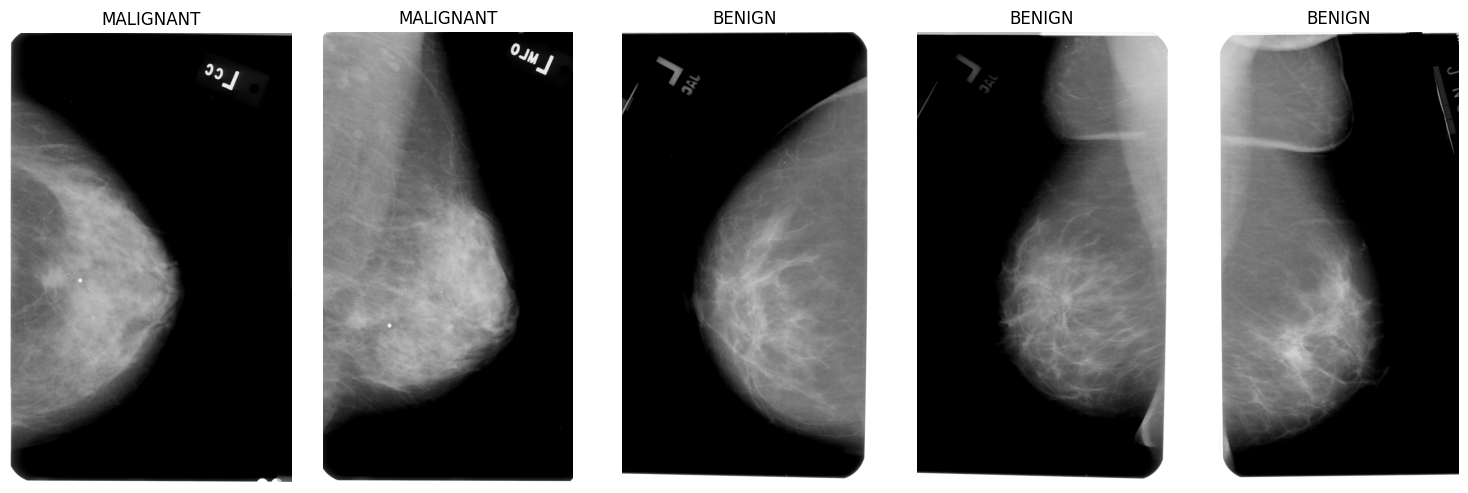

Cropped Mammograms:



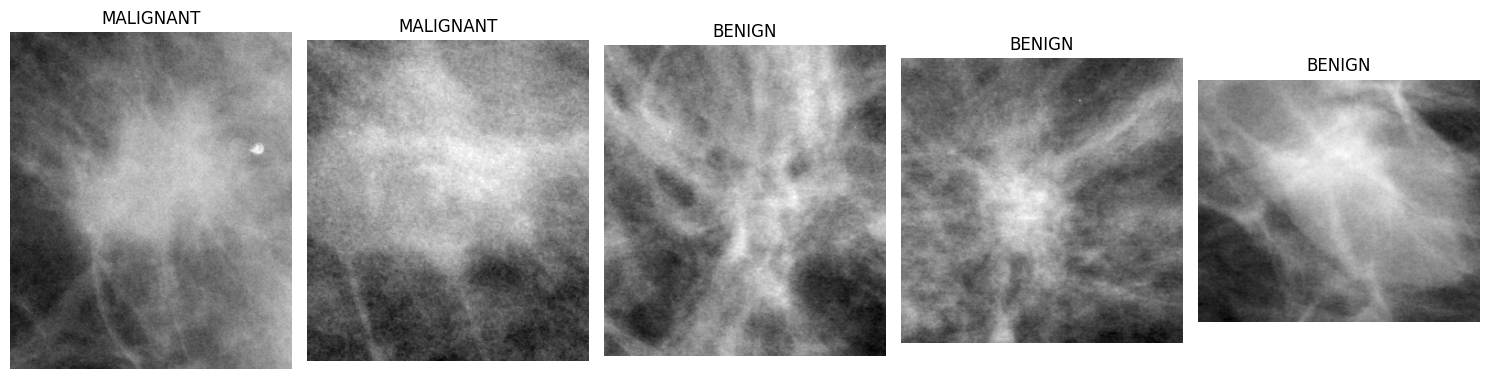

In [40]:
print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)


In [41]:
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image
from PIL import ImageEnhance
import os
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

def image_processor(image_path, target_size):
    """Preprocess images for the model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    pil_image = Image.fromarray(image)
    
    # Apply enhancements
    pil_image = ImageEnhance.Color(pil_image).enhance(1.35)
    pil_image = ImageEnhance.Contrast(pil_image).enhance(1.45)
    pil_image = ImageEnhance.Sharpness(pil_image).enhance(2.5)
    
    # Define color jitter transformations
    color_jitter = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)
    # Apply color jitter transformation
    transformed_image = color_jitter(pil_image)
    
    # Convert the PIL image back to a NumPy array
    image_array = np.array(transformed_image)
    
    # Normalize the image array
    image_array = image_array / 255.0
    
    # Data Augmentation using ImageDataGenerator
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True
    )
    image_array = datagen.random_transform(image_array)
    
    return image_array

2025-06-26 11:28:25.562195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-26 11:28:25.562304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-26 11:28:25.692405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [42]:
# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)
full_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [43]:
from torchvision import transforms

In [44]:
# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

In [45]:
mapper={'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

XX=np.array(full_mass['processed_images'].tolist())

In [46]:
full_mass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 377
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1696 non-null   object
 1   breast_density           1696 non-null   int64 
 2   left_or_right_breast     1696 non-null   object
 3   image_view               1696 non-null   object
 4   abnormality_id           1696 non-null   int64 
 5   abnormality type         1696 non-null   object
 6   mass_shape               1696 non-null   object
 7   mass_margins             1696 non-null   object
 8   assessment               1696 non-null   int64 
 9   pathology                1696 non-null   object
 10  subtlety                 1696 non-null   int64 
 11  image_file_path          1696 non-null   object
 12  cropped_image_file_path  1696 non-null   object
 13  ROI_mask_file_path       1696 non-null   object
 14  processed_images         1696 non-null   objec

In [47]:
# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(mapper)

/tmp/ipykernel_24/2562933181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_mass['labels'] = full_mass['pathology'].replace(mapper)


In [48]:
# Check the number of classes
num_classes = len(full_mass['labels'].unique())
num_classes

2

In [49]:
# List of columns to drop
columns_to_drop = ['patient_id', 'abnormality_id','assessment','subtlety']

# Drop the specified columns
full_mass = full_mass.drop(columns=columns_to_drop)

In [50]:
# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(XX, full_mass['labels'].values, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [51]:
# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [52]:
full_mass.head(3)

,breast_density,left_or_right_breast,image_view,abnormality type,mass_shape,mass_margins,pathology,image_file_path,cropped_image_file_path,ROI_mask_file_path,processed_images,labels
0,3,LEFT,CC,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[0.00392156862745098, 0.00392156862745098, 0...",1
1,3,LEFT,MLO,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,MALIGNANT,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,"[[[0.03137254901960784, 0.03137254901960784, 0...",1
2,3,LEFT,CC,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,BENIGN,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,"[[[0.6980392156862745, 0.6980392156862745, 0.6...",0


# Model:DenseNet121

In [53]:
from tensorflow.keras.applications.densenet import DenseNet121

In [54]:
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D,Dense
from tensorflow.keras.models import Model

In [55]:
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
#from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [56]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [57]:
# Create the DenseNet base model
modelRes = DenseNet201(weights='imagenet', pooling='avg',include_top=False, input_shape=(224, 224, 3))

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from keras.layers import Dense, BatchNormalization, Dropout

# Add custom classification layers on top of the base model
x = modelRes.output
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5
x = Dense(256, activation='relu')(x)  
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dropout(0.5)(x)  # Add Dropout layer with a dropout rate of 0.5
predictions = Dense(num_classes, activation='softmax')(x)

In [59]:
# Create the final model
model = Model(inputs=modelRes.input, outputs=predictions)

In [60]:
# Unfreeze some layers of the base model for fine-tuning
for layer in modelRes.layers:
    layer.trainable = False

In [61]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.01),  # Update lr to learning_rate
    metrics=['accuracy']
)

In [62]:
#model.summary()

In [63]:
# Calculate mean and standard deviation of training data
mean = np.mean(X_train)
std = np.std(X_train)

# Normalize training and test data
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
# Augment data
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Fit the data augmentation generator
train_datagen.fit(X_train)

# Apply augmentation to training data
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

In [66]:
# Augment data
val_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    #rescale=1./255  # Rescale pixel values to [0, 1]
)

# Fit the data augmentation generator
val_datagen.fit(X_val)

# Apply augmentation to training data
val_data_augmented = val_datagen.flow(X_val, y_val, batch_size=16)

In [67]:
# Train the model
history = model.fit(train_data_augmented,
                    epochs=100,
                    validation_data=val_data_augmented
                   )

# try for 50  epochs ---- loss function is too low -----   run for 100      --- next 75 epochs  

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:16:13 54s/step - accuracy: 0.5000 - loss: 1.1414

I0000 00:00:1750937707.500178      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1750937707.591884      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/85 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.4900 - loss: 1.1578

W0000 00:00:1750937750.344818      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.4906 - loss: 1.1532

W0000 00:00:1750937766.785781      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


85/85 ━━━━━━━━━━━━━━━━━━━━ 135s 955ms/step - accuracy: 0.4909 - loss: 1.1509 - val_accuracy: 0.4559 - val_loss: 2.2686
Epoch 2/100


W0000 00:00:1750937787.885003      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.5235 - loss: 0.7922 - val_accuracy: 0.5000 - val_loss: 0.8185
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.5555 - loss: 0.7507 - val_accuracy: 0.5147 - val_loss: 1.0232
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.5802 - loss: 0.7291 - val_accuracy: 0.7059 - val_loss: 0.6328
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.5982 - loss: 0.7120 - val_accuracy: 0.5441 - val_loss: 0.9225
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.5573 - loss: 0.7213 - val_accuracy: 0.5588 - val_loss: 0.7281
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.5982 - loss: 0.6855 - val_accuracy: 0.5441 - val_loss: 0.7627
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.6007 - loss: 0.6899 - val_accuracy: 0.6912 - val_loss: 0.6546
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.5900 - loss: 0.6797 - val_accuracy

In [68]:
class_names=mass_train['mass_margins'].unique()

In [69]:
#'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0 , 
# Define label_to_class mapping
label_to_class = {
    0: ('BENIGN', 'BENIGN_WITHOUT_CALLBACK'),
    1: 'MALIGNANT',
    # Add more mappings as needed
}

# Function to decode predictions
def decode_predictions(predictions, threshold=0.5):
    decoded_labels = []
    for pred in predictions:
        decoded_labels.append([label_to_class[i] for i, p in enumerate(pred) if p >= threshold])
    return decoded_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
True Class: MALIGNANT
Predicted Class: [[('BENIGN', 'BENIGN_WITHOUT_CALLBACK')]]


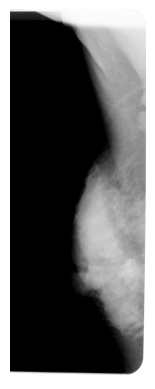

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True Class: BENIGN
Predicted Class: [[('BENIGN', 'BENIGN_WITHOUT_CALLBACK')]]


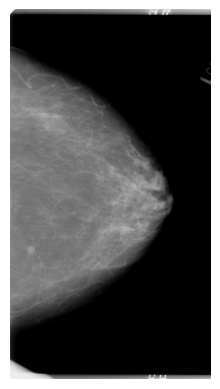

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
True Class: BENIGN_WITHOUT_CALLBACK
Predicted Class: [[('BENIGN', 'BENIGN_WITHOUT_CALLBACK')]]


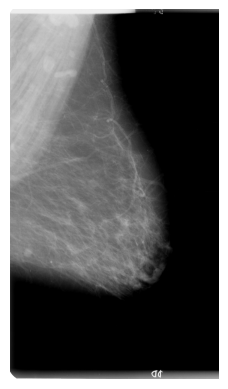

In [70]:
# Function to preprocess and load image
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize image to match model's input shape
    img = cv2.resize(img, (224, 224))
    # Normalize pixel values
    img = img.astype(np.float32) / 255.0
    # Convert to RGB color mode
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

# Select the first 5 images from mass_test_combined
test_images = mass_test['image_file_path'].iloc[1:10]
true_classes = mass_test['mass_margins'].iloc[1:10]

# Predict classes for each image
for image_path, true_class in zip(test_images, mapper):
    # Preprocess image
    img = preprocess_image(image_path)
    # Make prediction
    pred = model.predict(np.array([img]))
    predictions = decode_predictions(pred)
    # Print true and predicted classes
    print("True Class:", true_class)
    print("Predicted Class:", predictions)
    # Load and display the image
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Model Evaluation

In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

 2/43 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step 

W0000 00:00:1750939235.007434      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 362ms/step


W0000 00:00:1750939250.204951      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.88      0.52      0.65       747
   MALIGNANT       0.61      0.91      0.73       609

    accuracy                           0.69      1356
   macro avg       0.74      0.71      0.69      1356
weighted avg       0.75      0.69      0.69      1356



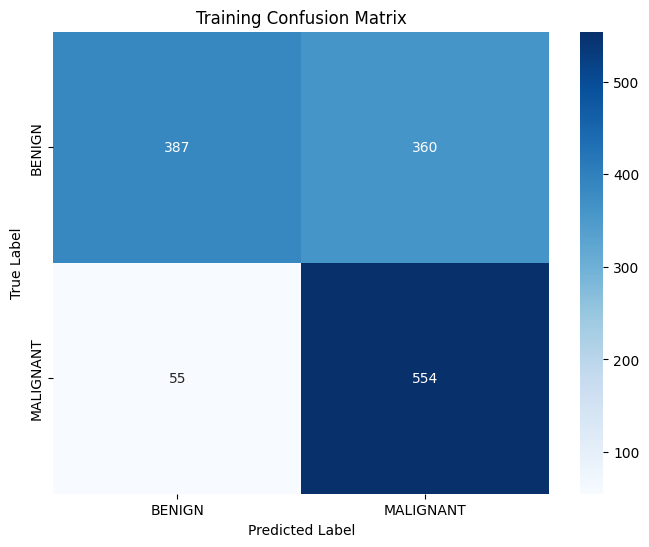

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step


W0000 00:00:1750939261.028560      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Validation Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.67      0.76      0.71        37
   MALIGNANT       0.65      0.55      0.60        31

    accuracy                           0.66        68
   macro avg       0.66      0.65      0.65        68
weighted avg       0.66      0.66      0.66        68



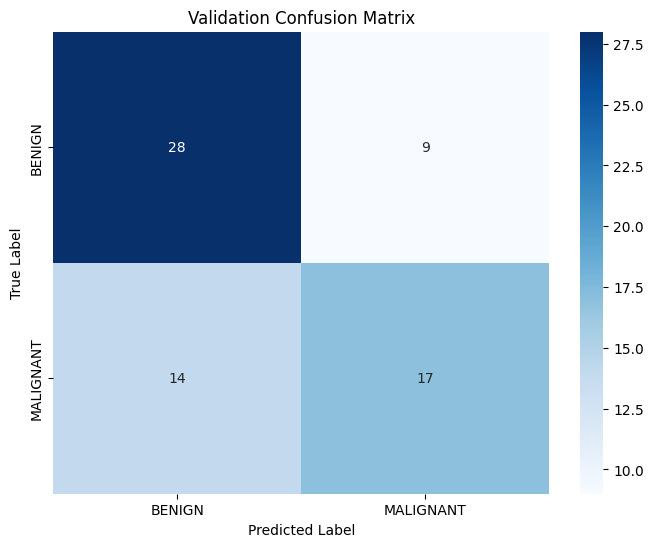

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


W0000 00:00:1750939272.825258      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.70      0.45      0.55       128
   MALIGNANT       0.63      0.83      0.71       144

    accuracy                           0.65       272
   macro avg       0.66      0.64      0.63       272
weighted avg       0.66      0.65      0.64       272



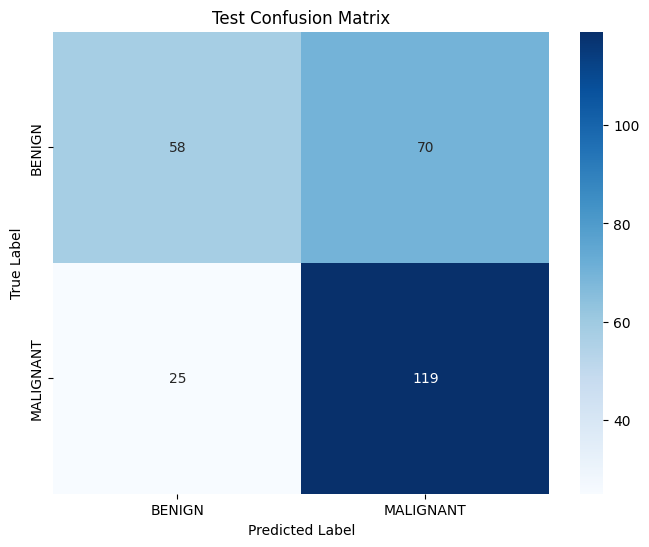

Overall Performance:
accuracy: 0.6688
recall: 0.7615
precision: 0.6299
f1: 0.6796


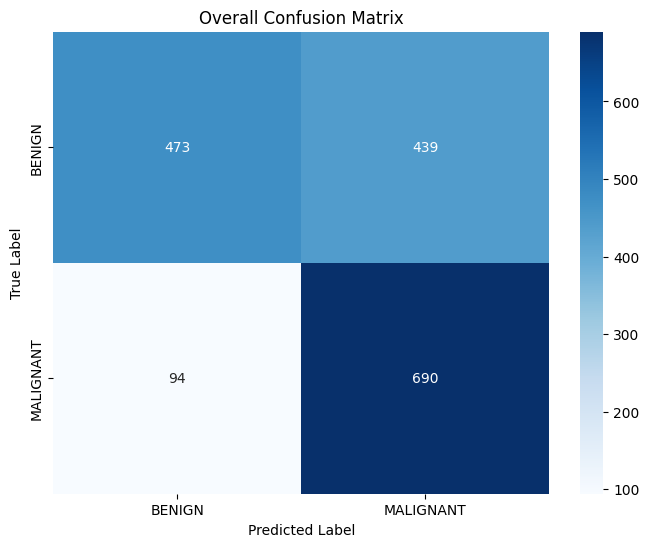

In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, datasets):
    all_metrics = {}
    all_confusion_matrices = {}
    
    for dataset_type, (X_data, y_data) in datasets.items():
        y_pred = model.predict(X_data)

        # Convert predictions to binary (0 or 1)
        y_pred_binary = np.argmax(y_pred, axis=1)
        y_true_binary = np.argmax(y_data, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_true_binary, y_pred_binary)
        recall = recall_score(y_true_binary, y_pred_binary)
        precision = precision_score(y_true_binary, y_pred_binary)
        f1 = f1_score(y_true_binary, y_pred_binary)
        confusion_mat = confusion_matrix(y_true_binary, y_pred_binary)
        
        all_metrics[dataset_type] = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}
        all_confusion_matrices[dataset_type] = confusion_mat
        
        # Print classification report
        print(f"{dataset_type} Classification Report:")
        print(classification_report(y_true_binary, y_pred_binary, target_names=["BENIGN", "MALIGNANT"]))
        
        # Plot confusion matrix heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["BENIGN", "MALIGNANT"], yticklabels=["BENIGN", "MALIGNANT"])
        plt.title(f"{dataset_type} Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
    
    # Aggregate confusion matrices for all datasets
    overall_confusion_matrix = sum(all_confusion_matrices.values())
    all_confusion_matrices["Overall"] = overall_confusion_matrix
    
    # Calculate overall performance metrics
    overall_performance = {}
    for metric_name in all_metrics["Training"].keys():
        overall_performance[metric_name] = np.mean([metrics[metric_name] for metrics in all_metrics.values()])
    
    # Print overall performance metrics
    print("Overall Performance:")
    for metric_name, value in overall_performance.items():
        print(f"{metric_name}: {value:.4f}")
    
    # Plot overall confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["BENIGN", "MALIGNANT"], yticklabels=["BENIGN", "MALIGNANT"])
    plt.title("Overall Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return all_metrics, all_confusion_matrices

# Usage example
datasets = {"Training": (X_train, y_train), "Validation": (X_val, y_val), "Test": (X_test, y_test)}
all_metrics, all_confusion_matrices = evaluate_model(model, datasets)


In [73]:
# plot metrics 
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plots training & validation metrics over epochs."""
    
    # Extract values
    history_dict = history.history
    epochs = range(1, len(history_dict['val_loss']) + 1)
    
    # Plot Validation Loss
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history_dict['val_loss'], 'r-', label='Validation Loss')
    plt.plot(epochs, history_dict.get('loss', []), 'b--', label='Training Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot Validation Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history_dict['val_accuracy'], 'g-', label='Validation Accuracy')
    plt.plot(epochs, history_dict.get('accuracy', []), 'b--', label='Training Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot Validation Precision (if available)
    if 'val_precision' in history_dict:
        plt.subplot(1, 3, 3)
        plt.plot(epochs, history_dict['val_precision'], 'm-', label='Validation Precision')
        if 'precision' in history_dict:
            plt.plot(epochs, history_dict['precision'], 'c--', label='Training Precision')
        plt.title('Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()
        plt.grid(True)
    else:
        print("Warning: 'val_precision' not found in history. Add 'tf.keras.metrics.Precision()' to model.compile.")

    plt.tight_layout()
    plt.show()


In [74]:
from tensorflow.keras.metrics import Precision

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', Precision()]
)

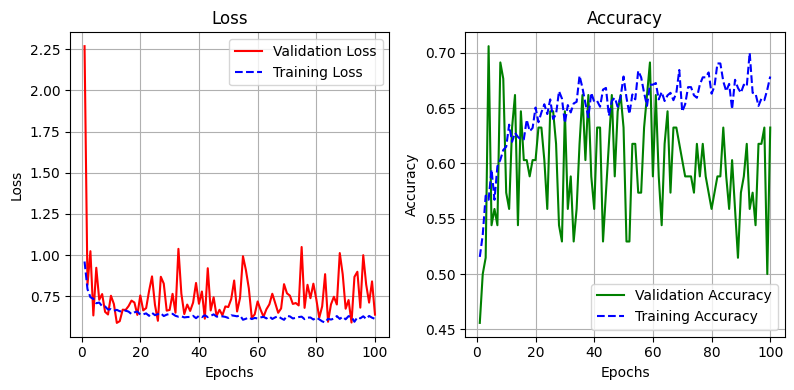

In [75]:
plot_training_history(history)

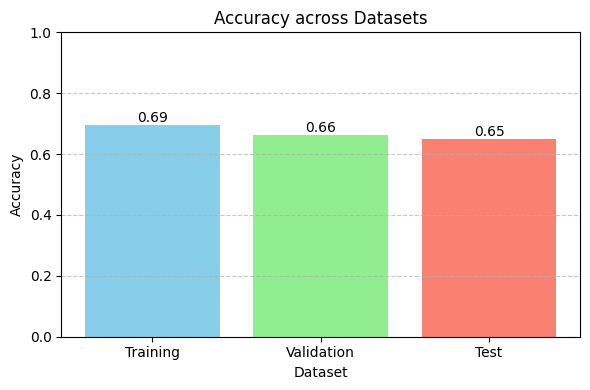

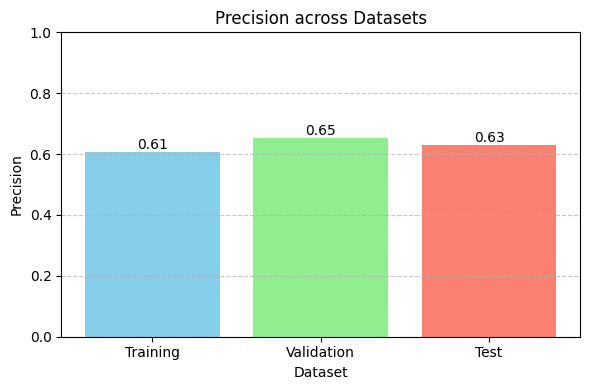

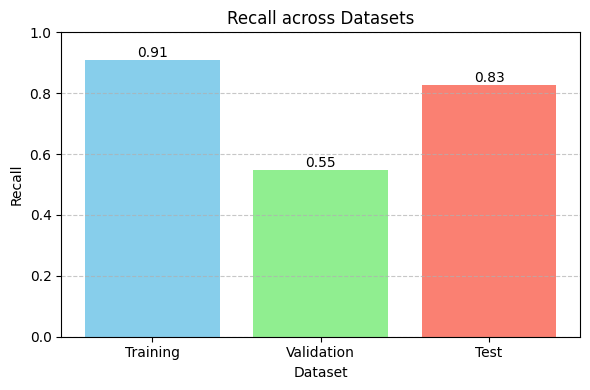

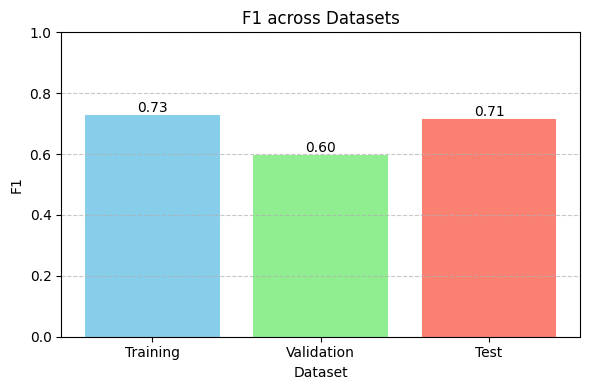

In [76]:
def plot_metrics(metric_dict, title="Model Performance Metrics"):
    metric_names = ["accuracy", "precision", "recall", "f1"]
    dataset_names = list(metric_dict.keys())
    
    for metric in metric_names:
        values = [metric_dict[ds][metric] for ds in dataset_names]
        
        plt.figure(figsize=(6, 4))
        bars = plt.bar(dataset_names, values, color=["skyblue", "lightgreen", "salmon"])
        for bar, val in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{val:.2f}", ha="center", fontsize=10)
        
        plt.ylim(0, 1)
        plt.title(f"{metric.capitalize()} across Datasets")
        plt.ylabel(metric.capitalize())
        plt.xlabel("Dataset")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Call the function
plot_metrics(all_metrics)


 2/43 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step

W0000 00:00:1750939295.736675      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


43/43 ━━━━━━━━━━━━━━━━━━━━ 33s 444ms/step


W0000 00:00:1750939314.375487      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


W0000 00:00:1750939323.064695      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


W0000 00:00:1750939332.848591      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


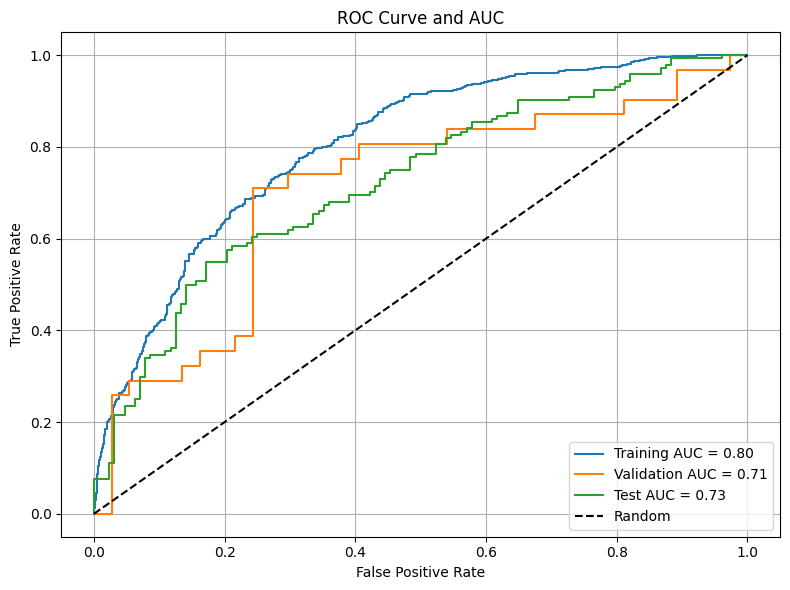

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_auc_curves(model, datasets):
    plt.figure(figsize=(8, 6))
    
    for dataset_name, (X_data, y_data) in datasets.items():
        y_pred = model.predict(X_data)
        y_true = y_data[:, 1]  # Assuming 2-class one-hot: index 1 is MALIGNANT
        y_scores = y_pred[:, 1]  # Probability for MALIGNANT
        
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{dataset_name} AUC = {roc_auc:.2f}')
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve and AUC")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_auc_curves(model, datasets)


#### References

https://www.kaggle.com/code/houda2001/soutenanceps